# Исследовательский анализ данных Яндекс Афиша в Python и проверка гипотез. 

Дата: 04.07.25

Автор: Анастасия

## Цели и задачи проекта
- Цель проекта:
    - Провести исследовательский анализ данных о бронировании билетов на сервисе Яндекс.Афиша за период с 1 июня по 31 октября 2024 года. Выявить сезонные изменения в поведении пользователей, популярные события, регионы и партнёры, а также проверить гипотезы о различиях в поведении пользователей мобильных и стационарных устройств.

- Задачи:

- Провести предобработку данных
- Выполнить исследовательский анализ данных (EDA)
- Проверить гипотезы
- Подвести общий вывод и дать рекомендации

## Содержание данных
Первый датасет final_tickets_orders_df.csv включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных. Поля датасета соответствуют таблице purchases:

•	order_id — уникальный идентификатор заказа.

•	user_id — уникальный идентификатор пользователя.

•	created_dt_msk — дата создания заказа (московское время).

•	created_ts_msk — дата и время создания заказа (московское время).

•	event_id — идентификатор мероприятия из таблицы events.

•	cinema_circuit — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.

•	age_limit — возрастное ограничение мероприятия.

•	currency_code — валюта оплаты, например rub для российских рублей.

•	device_type_canonical — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных;

•	revenue — выручка от заказа.

•	service_name — название билетного оператора.

•	tickets_count — количество купленных билетов.

•	total — общая сумма заказа.

В данные также был добавлен столбец days_since_prev с количеством дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.

Второй датасет final_tickets_events_df.csv содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия. Датасет содержит такие поля:

•	event_id — уникальный идентификатор мероприятия.

•	event_name — название мероприятия. Аналог поля event_name_code из исходной базы данных.

•	event_type_description — описание типа мероприятия.

•	event_type_main — основной тип мероприятия: театральная постановка, концерт и так далее.

•	organizers — организаторы мероприятия.

•	region_name — название региона.

•	city_name — название города.

•	venue_id — уникальный идентификатор площадки.

•	venue_name — название площадки.

•	venue_address — адрес площадки.

Выручка от заказов может бы представлена в разных валютах. 
Удобно будет привести данные к одной — к российским рублям.
В Есть датасет final_tickets_tenge_df.csv с информацией о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. Датасет содержит такие поля:

•	nominal — номинал (100 тенге);

•	data — дата;

•	curs — курс тенге к рублю;

•	cdx — обозначение валюты (kzt).



# Содержание проекта
### 1. Загрузка данных и знакомство с ними

  - Загрузка датасетов
  - Первичный осмотр
  - Предобработка данных и подготовка к исследованию

### 2. Проверка данных:

- Наличие пропусков
- Проверка дубликатов
- Обработка ошибок
- Преобразование типов данных
- Создание новых столбцов:
    - revenue_rub — выручка в рублях
    - one_ticket_revenue_rub — средняя стоимость одного билета
    - month — месяц оформления заказа
    - season — сезонность (лето, осень, зима, весна)
- Объединение датасетов

## 3. Исследовательский анализ данных (EDA)

### 3.1. Анализ распределения заказов по сегментам и их сезонные изменения

    Анализ дашборда показал, что в данных наблюдается сезонность — осенью количество заказов увеличивается. На стадии исследовательского анализа необходимо проследить изменение пользовательской активности или пользовательского интереса в связи с сезонностью:

 - Распределение числа заказов по месяцам (для каждого месяца найти ко-во заказов, построить график) 
 - Распределение долей заказов (летом и осенью) по:
        типам мероприятия event_type_main;
        типам устройства device_type_canonical;
        категория мероприятий по возрастному рейтингу age_limit.
- Для каждого типа мероприятия рассчитайть среднее значение выручки с одного билета, затем найти относительное изменение осенних значений по сравнению с летними. Результат сопроводите подходящей визуализацией.
- Вывод о том, как меняется распределение заказов в каждой категории с наступлением осени. Было ли изменение средней стоимости одного билета в разрезе разных типов мероприятий?

### 3.2 Осенняя активность пользователей

- Динамика заказов по дням
- DAU и среднее число заказов на пользователя
- Средняя стоимость билета
- Недельная цикличность (будни vs. выходные)
- Вывод

### 3.3. Популярные события и партнёры

- Регионы с наибольшим количеством заказов и разнообразием мероприятий
- Лидеры среди билетных партнёров по выручке и количеству заказов
- Расчет долей в процентах
- Вывод

## 4. Статистический анализ данных и проверка гипотез

#### 4.1. Гипотеза 1: Среднее количество заказов на одного пользователя выше у мобильных устройств
#### 4.2. Гипотеза 2: Среднее время между заказами больше у пользователей мобильных устройств
Используйте данные только за осенний период.
## Общий вывод и рекомендации
Краткий обзор данных и аналитических находок
Ответы на вопросы продуктовой команды:
Как изменились пользовательские предпочтения осенью
Какие мероприятия стали популярнее
Есть ли различия в поведении пользователей разных устройств
Рекомендации по развитию продукта на основе полученных инсайтов

## 1. Загрузка данных и знакомство с ними

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [2]:
# Создаем датафреймы
try:
    df_orders = pd.read_csv("C:...final_tickets_orders_df.csv")
    df_events = pd.read_csv("C:...final_tickets_events_df.csv")
    df_tenge = pd.read_csv("C:...final_tickets_tenge_df.csv")
except FileNotFoundError:
    df_orders = pd.read_csv('/datasets/final_tickets_orders_df.csv')
    df_events = pd.read_csv('/datasets/final_tickets_events_df.csv')
    df_tenge = pd.read_csv('/datasets/final_tickets_tenge_df.csv')

In [3]:
# Обзор данных
df_orders.info()
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    Столбцы с датой нужно будет превести к соотвествующему типу данных.

In [4]:
df_events.info()
df_events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [5]:
df_tenge.info()
df_tenge.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    На первый взгляд данные хорошего качества, серьезных проблем не ждем

## 2. Проверка данных

In [6]:
#Предобработка данных и подготовка к исследованию
# Проверка пропусков
display(df_orders.isnull().sum())

order_id                     0
user_id                      0
created_dt_msk               0
created_ts_msk               0
event_id                     0
cinema_circuit               0
age_limit                    0
currency_code                0
device_type_canonical        0
revenue                      0
service_name                 0
tickets_count                0
total                        0
days_since_prev          21940
dtype: int64

In [7]:
display(df_events.isnull().sum())

event_id                  0
event_name                0
event_type_description    0
event_type_main           0
organizers                0
region_name               0
city_name                 0
city_id                   0
venue_id                  0
venue_name                0
venue_address             0
dtype: int64

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    Пропуски только в 1 столбце датафрейма с заказами. Посмотрим на количество уникальных значений столбцов

In [8]:
#Уникальные значения 
display(df_orders.nunique())

order_id                 290849
user_id                   21940
created_dt_msk              153
created_ts_msk           280986
event_id                  22446
cinema_circuit                6
age_limit                     5
currency_code                 2
device_type_canonical         2
revenue                   42528
service_name                 36
tickets_count                22
total                     55473
days_since_prev             149
dtype: int64

In [9]:
display(df_events.nunique())

event_id                  22427
event_name                15248
event_type_description       20
event_type_main               7
organizers                 4293
region_name                  81
city_name                   352
city_id                     353
venue_id                   3225
venue_name                 3217
venue_address              3225
dtype: int64

In [10]:
# Смотрим на распределение количествa дней с предыдущей покупки 
print(df_orders['days_since_prev'].value_counts(dropna=True).sort_index())

0.0      184226
1.0       30496
2.0        9953
3.0        6181
4.0        4421
          ...  
144.0         4
145.0         3
146.0         6
147.0         3
148.0         3
Name: days_since_prev, Length: 149, dtype: int64


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    Можно предположить, что пользователи чаще совершают покупки сразу после предыдущей, и только небольшая часть возвращается спустя длительное время. Это обычная ситуация у сервисов с высокой вовлеченностью или постоянной клиентской базой. 
    Количество пропусков в days_since_prev соответствует числу пользователй, а значит это отправные точки для пользователей - дни начала активности\регистрации

In [11]:
df_orders['days_since_prev'].unique()

array([ nan,  75.,  83.,  19.,  16.,   0.,   1.,  74.,  13.,  25.,  30.,
        29.,  23.,  63.,  14.,  11.,   7.,   5.,  26.,  10.,  15.,   3.,
         4.,  70.,  20.,  35.,  33.,  22.,  53.,  39.,  31.,  17.,  27.,
        40.,  24.,  12.,  47.,   9.,   2.,   6.,  51.,  55.,  18.,  68.,
        52.,   8.,  71.,  28.,  46., 134.,  41.,  79.,  86.,  60.,  49.,
       122.,  32.,  78.,  80.,  38.,  37.,  85.,  88.,  43., 128.,  61.,
       108.,  21.,  50.,  81., 137.,  48.,  45.,  94.,  34.,  84., 107.,
        42.,  44.,  56.,  82., 123., 101.,  69., 115.,  97.,  36., 112.,
        65.,  99.,  67.,  91.,  95.,  57.,  77.,  58.,  73.,  59., 132.,
        93.,  72., 129.,  62., 118.,  96., 100., 105.,  54.,  76., 131.,
       104.,  92., 114., 127., 109., 121.,  66.,  64., 110., 103., 148.,
        90.,  98.,  89., 120., 139., 144., 102.,  87., 135., 116., 141.,
       111., 124., 106., 113., 145., 117., 142., 130., 126., 146., 140.,
       125., 136., 133., 147., 119., 138., 143.])

In [13]:
#стб с датами нужно привести к типу дата
df_orders['created_dt_msk'] = pd.to_datetime(df_orders['created_dt_msk'])     
df_orders['created_ts_msk'] = pd.to_datetime(df_orders['created_ts_msk'])
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   order_id               290849 non-null  int64         
 1   user_id                290849 non-null  object        
 2   created_dt_msk         290849 non-null  datetime64[ns]
 3   created_ts_msk         290849 non-null  datetime64[ns]
 4   event_id               290849 non-null  int64         
 5   cinema_circuit         290849 non-null  object        
 6   age_limit              290849 non-null  int64         
 7   currency_code          290849 non-null  object        
 8   device_type_canonical  290849 non-null  object        
 9   revenue                290849 non-null  float64       
 10  service_name           290849 non-null  object        
 11  tickets_count          290849 non-null  int64         
 12  total                  290849 non-null  floa

In [14]:
# Проверка на явные дубликаты
print(df_orders.duplicated().sum())
print(df_events.duplicated().sum())

0
0


In [15]:
# Проверка на неявные дубликаты
diplicates =df_orders[df_orders.duplicated(subset=['user_id', 'created_ts_msk', 'device_type_canonical',
    'service_name', 'event_id',
    'revenue', 'total', 'event_id'], keep=False)]
print(f"Количество неявных дубликатов: {diplicates.shape[0]}")

Количество неявных дубликатов: 81


In [16]:
# Удаляем неявные дубликаты
df_orders = df_orders.drop_duplicates(subset=['user_id', 'created_ts_msk', 'device_type_canonical',
                                             'service_name', 'event_id',
                                             'revenue', 'total', 'event_id'], keep=False)


In [17]:
#Проверяем еще раз на дубли
diplicates_new =df_orders[df_orders.duplicated(subset=['user_id', 'created_ts_msk', 'device_type_canonical',
    'service_name', 'event_id',
    'revenue', 'total', 'event_id'], keep=False)]
print(f"Количество неявных дубликатов: {diplicates.shape[0]}")

Количество неявных дубликатов: 81


Создание новых столбцов:
- revenue_rub — выручка в рублях
- one_ticket_revenue_rub — средняя стоимость одного билета
- month — месяц оформления заказа
- season — сезонность (лето, осень, зима, весна)

In [18]:
# Создание новых столбцов:
    # revenue_rub  — выручка в рублях
def convert(row):
    #если валюта указана в тенге
    if row['currency_code'] == 'ktz':
        # то находим курс заказа в этот день
        rate_date = row['created_dt_msk'].date()
        rate = df_tenge[df_tenge['data'] == str(rate_date)]['curs'].values
        if len(rate) > 0:
            return row['revenue'] * rate[0] / 100  # Конвертируем тенге в рубли
    elif row['currency_code'] == 'rub':
        return row['revenue']
    else:
        return np.nan
 

In [19]:
# Применяем функцию на df
df_orders['revenue_rub'] = df_orders.apply(convert, axis=1)

In [20]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290768 entries, 0 to 290848
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   order_id               290768 non-null  int64         
 1   user_id                290768 non-null  object        
 2   created_dt_msk         290768 non-null  datetime64[ns]
 3   created_ts_msk         290768 non-null  datetime64[ns]
 4   event_id               290768 non-null  int64         
 5   cinema_circuit         290768 non-null  object        
 6   age_limit              290768 non-null  int64         
 7   currency_code          290768 non-null  object        
 8   device_type_canonical  290768 non-null  object        
 9   revenue                290768 non-null  float64       
 10  service_name           290768 non-null  object        
 11  tickets_count          290768 non-null  int64         
 12  total                  290768 non-null  floa

In [21]:
df_orders.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,revenue_rub
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,1521.94
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,289.45
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,1258.57
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,8.49
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,1390.41


In [22]:
    #one_ticket_revenue_rub — средняя стоимость одного билета
df_orders['one_ticket_revenue_rub'] = df_orders['revenue_rub'] / df_orders['tickets_count']

In [23]:
df_orders.info()
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290768 entries, 0 to 290848
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290768 non-null  int64         
 1   user_id                 290768 non-null  object        
 2   created_dt_msk          290768 non-null  datetime64[ns]
 3   created_ts_msk          290768 non-null  datetime64[ns]
 4   event_id                290768 non-null  int64         
 5   cinema_circuit          290768 non-null  object        
 6   age_limit               290768 non-null  int64         
 7   currency_code           290768 non-null  object        
 8   device_type_canonical   290768 non-null  object        
 9   revenue                 290768 non-null  float64       
 10  service_name            290768 non-null  object        
 11  tickets_count           290768 non-null  int64         
 12  total                   290768

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,revenue_rub,one_ticket_revenue_rub
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,1521.94,380.4850
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,289.45,144.7250
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,1258.57,314.6425
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,8.49,4.2450
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,1390.41,463.4700


In [24]:
    #month месяц оформления заказа
df_orders['month'] = pd.DatetimeIndex(df_orders['created_dt_msk']).month

In [25]:
df_orders.info()
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290768 entries, 0 to 290848
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290768 non-null  int64         
 1   user_id                 290768 non-null  object        
 2   created_dt_msk          290768 non-null  datetime64[ns]
 3   created_ts_msk          290768 non-null  datetime64[ns]
 4   event_id                290768 non-null  int64         
 5   cinema_circuit          290768 non-null  object        
 6   age_limit               290768 non-null  int64         
 7   currency_code           290768 non-null  object        
 8   device_type_canonical   290768 non-null  object        
 9   revenue                 290768 non-null  float64       
 10  service_name            290768 non-null  object        
 11  tickets_count           290768 non-null  int64         
 12  total                   290768

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,revenue_rub,one_ticket_revenue_rub,month
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,1521.94,380.4850,8
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,289.45,144.7250,7
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,1258.57,314.6425,10
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,8.49,4.2450,7
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,1390.41,463.4700,10


In [26]:
    # season — сезонность (лето, осень, зима, весна)
# Функция, распределяющая месяца по сезонам
def season(month):
    
        if month in [12, 1, 2]:
            return 'зима'
        elif month in [3, 4, 5]:
            return 'весна'
        elif month in [6, 7, 8]:
            return 'лето'
        elif month in [9, 10, 11]:
            return 'осень'
        else:
            return 'Некорректный месяц' 


In [27]:
df_orders['season'] = df_orders['month'].apply(season)

In [28]:
df_orders.info()
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290768 entries, 0 to 290848
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290768 non-null  int64         
 1   user_id                 290768 non-null  object        
 2   created_dt_msk          290768 non-null  datetime64[ns]
 3   created_ts_msk          290768 non-null  datetime64[ns]
 4   event_id                290768 non-null  int64         
 5   cinema_circuit          290768 non-null  object        
 6   age_limit               290768 non-null  int64         
 7   currency_code           290768 non-null  object        
 8   device_type_canonical   290768 non-null  object        
 9   revenue                 290768 non-null  float64       
 10  service_name            290768 non-null  object        
 11  tickets_count           290768 non-null  int64         
 12  total                   290768

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,1521.94,380.4850,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,289.45,144.7250,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,1258.57,314.6425,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,8.49,4.2450,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,1390.41,463.4700,10,осень


In [29]:
# Объединение дф
df = pd.merge(df_orders, df_events, on='event_id', how='left')

In [30]:
# Обзор нового дф
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290768 entries, 0 to 290767
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290768 non-null  int64         
 1   user_id                 290768 non-null  object        
 2   created_dt_msk          290768 non-null  datetime64[ns]
 3   created_ts_msk          290768 non-null  datetime64[ns]
 4   event_id                290768 non-null  int64         
 5   cinema_circuit          290768 non-null  object        
 6   age_limit               290768 non-null  int64         
 7   currency_code           290768 non-null  object        
 8   device_type_canonical   290768 non-null  object        
 9   revenue                 290768 non-null  float64       
 10  service_name            290768 non-null  object        
 11  tickets_count           290768 non-null  int64         
 12  total                   290768

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"


In [31]:
# Обзор объединенного df
print('Пропуски')
display(df.isnull().sum())

Пропуски


order_id                      0
user_id                       0
created_dt_msk                0
created_ts_msk                0
event_id                      0
cinema_circuit                0
age_limit                     0
currency_code                 0
device_type_canonical         0
revenue                       0
service_name                  0
tickets_count                 0
total                         0
days_since_prev           21939
revenue_rub                5067
one_ticket_revenue_rub     5067
month                         0
season                        0
event_name                  238
event_type_description      238
event_type_main             238
organizers                  238
region_name                 238
city_name                   238
city_id                     238
venue_id                    238
venue_name                  238
venue_address               238
dtype: int64

In [32]:
# строки с пропусками в revenue_rub
display(df[df['revenue_rub'].isnull()].head(20))

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
73,7850214,0033403583a55ed,2024-09-17,2024-09-17 16:52:06,559919,нет,6,kzt,mobile,518.10,...,f5ec2467-ee48-42f3-89a0-a2d90d1d6fce,событие,другое,№5088,Верхоречная область,Серебрянка,163.0,1533.0,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7"
92,8634925,0040e12d70fae81,2024-09-02,2024-09-02 19:49:14,559476,нет,6,kzt,desktop,347.18,...,61ec7c0e-ea0c-4a3e-a63a-09cbe1bc6177,событие,другое,№5088,Верхоречная область,Серебрянка,163.0,1533.0,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7"
99,7625522,0054b38b2653e6e,2024-09-09,2024-09-09 18:06:04,559582,нет,6,kzt,mobile,328.77,...,524f434e-0381-4f47-9688-7c4e41961b65,событие,другое,№5088,Верхоречная область,Серебрянка,163.0,1533.0,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7"
289,720419,00f4f5244501ce6,2024-06-11,2024-06-11 20:15:57,536826,нет,12,kzt,mobile,22021.55,...,76af4f88-c554-4e9e-9df4-1cc8aeec8959,концерт,концерты,№4950,Верхоречная область,Серебрянка,163.0,2066.0,"Архитектурное бюро ""Секрет"" Инк","пер. Проточный, д. 70 к. 881"
472,5227657,01370a0e9c1a7d5,2024-06-04,2024-06-04 13:28:17,533803,нет,16,kzt,desktop,7397.66,...,0686ac7b-6f3e-4177-bb73-16b54acd1223,фестиваль,концерты,№4950,Шанырский регион,Широковка,162.0,3407.0,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7"
473,2229782,01370a0e9c1a7d5,2024-06-04,2024-06-04 13:17:35,533803,нет,16,kzt,mobile,3698.83,...,0686ac7b-6f3e-4177-bb73-16b54acd1223,фестиваль,концерты,№4950,Шанырский регион,Широковка,162.0,3407.0,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7"
474,2229811,01370a0e9c1a7d5,2024-06-04,2024-06-04 13:19:47,533803,нет,16,kzt,mobile,7397.66,...,0686ac7b-6f3e-4177-bb73-16b54acd1223,фестиваль,концерты,№4950,Шанырский регион,Широковка,162.0,3407.0,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7"
475,2229753,01370a0e9c1a7d5,2024-06-04,2024-06-04 13:26:32,533803,нет,16,kzt,mobile,5548.24,...,0686ac7b-6f3e-4177-bb73-16b54acd1223,фестиваль,концерты,№4950,Шанырский регион,Широковка,162.0,3407.0,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7"
476,2229724,01370a0e9c1a7d5,2024-06-04,2024-06-04 13:25:28,533803,нет,16,kzt,mobile,7397.66,...,0686ac7b-6f3e-4177-bb73-16b54acd1223,фестиваль,концерты,№4950,Шанырский регион,Широковка,162.0,3407.0,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7"
528,2044327,01370a0e9c1a7d5,2024-09-05,2024-09-05 16:13:00,561747,нет,16,kzt,mobile,361.08,...,27956246-d4a5-4b76-b5db-719831c41591,событие,другое,№4950,Шанырский регион,Синеводск,29463.0,3407.0,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7"


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    Есть закономерность в пропусках, все они у 2-х мероприятий Верхоречная область	Серебрянка Клуб настольного тенниса "Фазенда" Инк	пер. Семашко, д. 8/7 стр. 7	 и Шанырский регион	Синеводск	29463.0	3407.0	Арт-кафе "Речка" Лимитед	алл. Путейская, д. 548 стр. 7	
    
    По какой-то причине для дат этих событий не был указан курс.

In [33]:
# строки с пропусками в event_name
print(df[df['event_name'].isnull()].head())

     order_id          user_id created_dt_msk      created_ts_msk  event_id  \
62    6493246  002ec276eee9b0b     2024-10-14 2024-10-14 16:27:53    533222   
63    6493275  002ec276eee9b0b     2024-10-14 2024-10-14 16:22:38    533222   
64    6493304  002ec276eee9b0b     2024-10-14 2024-10-14 16:29:20    533222   
237   8272280  00da083909dc06b     2024-06-07 2024-06-07 17:50:50    530296   
238   8272512  00da083909dc06b     2024-06-07 2024-06-07 17:49:16    530296   

    cinema_circuit  age_limit currency_code device_type_canonical  revenue  \
62             нет          6           rub                mobile    78.75   
63             нет          6           rub                mobile    78.75   
64             нет          6           rub                mobile   118.12   
237            нет         18           rub                mobile     0.00   
238            нет         18           rub                mobile     0.00   

     ... event_name  event_type_description  event_type_

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
Пропуски в ко-ве 238 строк по стб event_name    
- event_type_description   
- event_type_main              
- organizers                 
- region_name                
- city_name                  
- city_id                    
- venue_id                   
- venue_name                 
- venue_address   
Необходимо удалить те строки, где не известны данные о мероприятии, организации, регионе, городе, площадке и адресе площадки

In [34]:
def delete_rows_with_na(df):
    """
    Удаляет строки из DataFrame, содержащие пропуски в указанных столбцах.

    Args:
        df: Pandas DataFrame.

    Returns:
        Pandas DataFrame с удаленными строками.
    """

    columns_with_na = [
        'event_type_description',
        'event_type_main',
        'organizers',
        'region_name',
        'city_name',
        'city_id',
        'venue_id',
        'venue_name',
        'venue_address'
    ]

    # Удаляем строки, где есть NaN хотя бы в одном из указанных столбцов.
    df_cleaned = df.dropna(subset=columns_with_na)

    return df_cleaned


df_cleaned = delete_rows_with_na(df)

In [35]:
print('Пропуски')
display(df_cleaned.isnull().sum())

Пропуски


order_id                      0
user_id                       0
created_dt_msk                0
created_ts_msk                0
event_id                      0
cinema_circuit                0
age_limit                     0
currency_code                 0
device_type_canonical         0
revenue                       0
service_name                  0
tickets_count                 0
total                         0
days_since_prev           21912
revenue_rub                5067
one_ticket_revenue_rub     5067
month                         0
season                        0
event_name                    0
event_type_description        0
event_type_main               0
organizers                    0
region_name                   0
city_name                     0
city_id                       0
venue_id                      0
venue_name                    0
venue_address                 0
dtype: int64

In [36]:
print('Уникальные значения')
display(df.nunique())

Уникальные значения


order_id                  290768
user_id                    21940
created_dt_msk               153
created_ts_msk            280962
event_id                   22446
cinema_circuit                 6
age_limit                      5
currency_code                  2
device_type_canonical          2
revenue                    42528
service_name                  36
tickets_count                 22
total                      55473
days_since_prev              149
revenue_rub                42308
one_ticket_revenue_rub     39133
month                          5
season                         2
event_name                 15248
event_type_description        20
event_type_main                7
organizers                  4293
region_name                   81
city_name                    352
city_id                      353
venue_id                    3225
venue_name                  3217
venue_address               3225
dtype: int64

In [37]:
# Проверяем уникальные значения в отдельных стб
display(df['device_type_canonical'].unique())

array(['mobile', 'desktop'], dtype=object)

In [38]:
display(df['event_type_main'].unique())

array(['театр', 'выставки', 'другое', 'стендап', 'концерты', 'спорт', nan,
       'ёлки'], dtype=object)

In [39]:
display(df['age_limit'].unique())

array([16,  0, 18, 12,  6])

In [40]:
display(df['cinema_circuit'].unique())

array(['нет', 'Другое', 'Киномакс', 'КиноСити', 'Москино', 'ЦентрФильм'],
      dtype=object)

In [41]:
display(df['currency_code'].unique())

array(['rub', 'kzt'], dtype=object)

In [42]:
display(df['service_name'].unique())

array(['Край билетов', 'Мой билет', 'За билетом!', 'Лови билет!',
       'Билеты без проблем', 'Облачко', 'Лучшие билеты', 'Прачечная',
       'Быстробилет', 'Дом культуры', 'Весь в билетах', 'Билеты в руки',
       'Тебе билет!', 'Show_ticket', 'Городской дом культуры', 'Яблоко',
       'Билет по телефону', 'Выступления.ру', 'Росбилет',
       'Шоу начинается!', 'Мир касс', 'Восьмёрка', 'Телебилет',
       'Crazy ticket!', 'Реестр', 'Быстрый кассир', 'КарандашРУ',
       'Радио ticket', 'Дырокол', 'Вперёд!', 'Кино билет', 'Цвет и билет',
       'Зе Бест!', 'Тех билет', 'Лимоны', 'Билеты в интернете'],
      dtype=object)

In [43]:
display(df['event_type_description'].unique())

array(['спектакль', 'событие', 'цирковое шоу', 'выставка', 'шоу',
       'концерт', 'спорт', 'мюзикл', 'фестиваль', nan, 'ёлка', 'балет',
       'спортивное мероприятие', 'опера', 'музыкальный спектакль',
       'кукольный спектакль', 'оперетта', 'снегурочка', 'рок-мюзикл',
       'экскурсия', 'подарок'], dtype=object)

In [44]:
display(df['event_type_main'].unique())

array(['театр', 'выставки', 'другое', 'стендап', 'концерты', 'спорт', nan,
       'ёлки'], dtype=object)

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    
 - Дубликатов больше нет
    
 - Принято решение удалитьстроки, где не известны данные о мероприятии, организации, регионе, городе, площадке и адресе площадки
    
 - Столбцы с датой переведены в формат даты.
    
 - Созданы новые столбцы согласно ТЗ

 - Объединили orders и events по event_id

# Исследовательский анализ данных

## 3. Исследовательский анализ данных (EDA)
3.1. Анализ распределения заказов по сегментам и их сезонные изменения
    Анализ дашборда показал, что в данных наблюдается сезонность — осенью количество заказов увеличивается. На стадии исследовательского анализа необходимо проследить изменение пользовательской активности или пользовательского интереса в связи с сезонностью:
- Распределение числа заказов по месяцам (для каждого месяца найти ко-во заказов, построить график)
- Распределение долей заказов (летом и осенью) по:
     типам мероприятия event_type_main;
     типам устройства device_type_canonical;
     категория мероприятий по возрастному рейтингу age_limit.
- Для каждого типа мероприятия рассчитайть среднее значение выручки с одного билета, затем найти относительное изменение осенних значений по сравнению с летними. Результат сопроводите подходящей визуализацией.

- Вывод о том, как меняется распределение заказов в каждой категории с наступлением осени. Было ли изменение средней стоимости одного билета в разрезе разных типов мероприятий?

In [45]:
# Статистика по количественным значениям
print("Статистика по выручке, числу билетов и средней стоимости билета:")
display(df[['revenue', 'tickets_count', 'one_ticket_revenue_rub']].describe())

Статистика по выручке, числу билетов и средней стоимости билета:


,revenue,tickets_count,one_ticket_revenue_rub
count,290768.000000,290768.000000,285701.000000
mean,625.127163,2.754251,198.158426
std,1227.438020,1.170430,302.074578
min,-90.760000,1.000000,-18.152000
25%,116.790000,2.000000,46.820000
50%,355.340000,3.000000,147.625000
75%,809.712500,4.000000,306.336667
max,81174.540000,57.000000,21757.540000


In [46]:
# Расчёт 99-го процентиля для выручки и ко-ва билетов
revenues = df['revenue'].quantile(0.99)
print(f"99-й процентиль для выручки: {revenues:.2f}")
tickets= df['tickets_count'].quantile(0.99)
print(f"99-й процентиль для количества билетов: {tickets}")

99-й процентиль для выручки: 4000.19
99-й процентиль для количества билетов: 6.0


In [47]:
# Ограничиваем значения 99-м процентилем
df_filter = df[
    (df['revenue'] <= revenues) &
    (df['tickets_count'] <= tickets)
]

print("Размер данных до фильтрации:", len(df))
print("Размер данных после фильтрации:", len(df_filter))
print("Процент отфильтрованных записей:", round((len(df) - len(df_filter)) / len(df) * 100, 2), "%")

Размер данных до фильтрации: 290768
Размер данных после фильтрации: 287674
Процент отфильтрованных записей: 1.06 %


In [48]:
display(df_filter[['revenue', 'tickets_count', 'one_ticket_revenue_rub']].describe())

,revenue,tickets_count,one_ticket_revenue_rub
count,287674.000000,287674.000000,284944.000000
mean,537.381596,2.744628,192.271959
std,563.985428,1.144376,171.527689
min,-90.760000,1.000000,-18.152000
25%,114.910000,2.000000,46.820000
50%,347.180000,3.000000,146.961250
75%,791.840000,3.000000,303.870000
max,4000.190000,6.000000,3328.470000


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
 
 - Выявяены выбросы в выручке (до 81 млн руб.) и числе билетов (до 57 шт.)
 - минимальное значение выручки уходит в минус 91 руб
 - 99-й процентиль для:
    выручки 4000.19 р
    количества билетов до 6 билетов.
    Данные ограничены 99-м процентилем

In [ ]:
def rename_month_and_plot_orders(df_filter):
    """
    Переименовывает номер месяца в столбце 'month' в название месяца на русском языке.
    """
    month_dict = {
        1: 'Январь',
        2: 'Февраль',
        3: 'Март',
        4: 'Апрель',
        5: 'Май',
        6: 'Июнь',
        7: 'Июль',
        8: 'Август',
        9: 'Сентябрь',
        10: 'Октябрь',
        11: 'Ноябрь',
        12: 'Декабрь'
    }
    # Переименование месяца
    df_filter['month_name'] = df_filter['month'].map(month_dict)  # Создаем новый столбец с названиями

# Вызов функции для переименования месяцев
rename_month_and_plot_orders(df_filter)

# Группировка по месяцам и подсчет количества заказов
orders_per_month = df_filter.groupby('month_name')['order_id'].count().sort_values(ascending=True)  # Сортируем по названию месяца

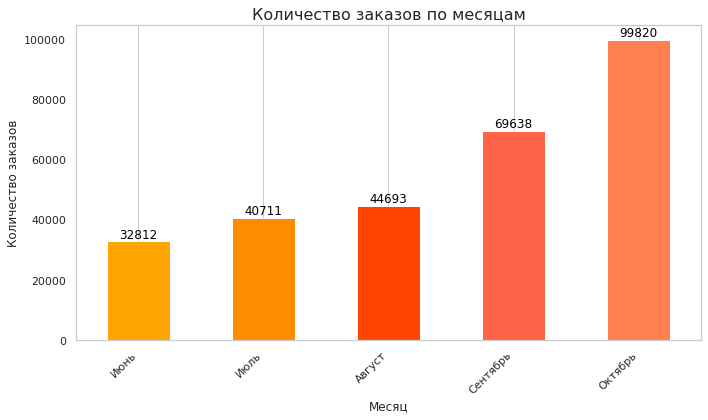

In [50]:
# Визуализация распределения числа заказов по месяцам  
# Создание столбчатой диаграммы
# Настройка стиля графика
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
# Построение распределения по месяцам
orders_per_month.plot(kind='bar', color=['#FFA500','#FF8C00', '#FF4500','#FF6347', '#FF7F50'] )
plt.title('Количество заказов по месяцам', fontsize=16)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.xticks(rotation=45, ha='right') # Поворачиваем метки оси X для лучшей читаемости
plt.grid(axis='y', linestyle='--') # Добавляем сетку по оси Y для удобства чтения
# Добавление чисел на столбцы
for i, v in enumerate(orders_per_month):
    plt.text(i, v + 1, str(v),color='black', ha='center', va='bottom', fontsize=12)
plt.tight_layout() # Автоматически корректирует параметры подграфика, чтобы он помещался в область фигуры.
plt.show()

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    Прослеживается рост числа заказов от июня до октября включительно.
    в июле прирост составил 18% по сравнению с июнем
    в августе прирост составил 10% по сравнению с июлем
    в сентябре прирост составил 55% по сравнению с августом
    в октябре прирост составил 43% по сравнению с сентябрем
Причиной может быть сезон отпусков. 
    Рекомендуется дополнительно выяснить до какого месяца идет подъем, а когда начинается спад активности

Распределение долей заказов (летом и осенью) по:
 - типам мероприятия event_type_main;
 - типам устройства device_type_canonical;
 - категория мероприятий по возрастному рейтингу age_limit.

In [51]:
# Фильтрация данных по сезонам 
# Сортируем значения по убыванию
summer = df_filter[df_filter['month'].isin([6, 7, 8])]
autumn = df_filter[df_filter['month'].isin([9, 10])]

In [52]:
summer_events =summer['event_type_main'].value_counts(normalize=True).sort_values(ascending=True)
autumn_events =autumn['event_type_main'].value_counts(normalize=True).sort_values(ascending=True)

In [53]:
print(summer_events.head())
print(autumn_events.head())

ёлки        0.002331
выставки    0.020466
спорт       0.025492
стендап     0.054076
театр       0.204314
Name: event_type_main, dtype: float64
ёлки        0.010092
выставки    0.014383
стендап     0.040983
спорт       0.111346
другое      0.195974
Name: event_type_main, dtype: float64


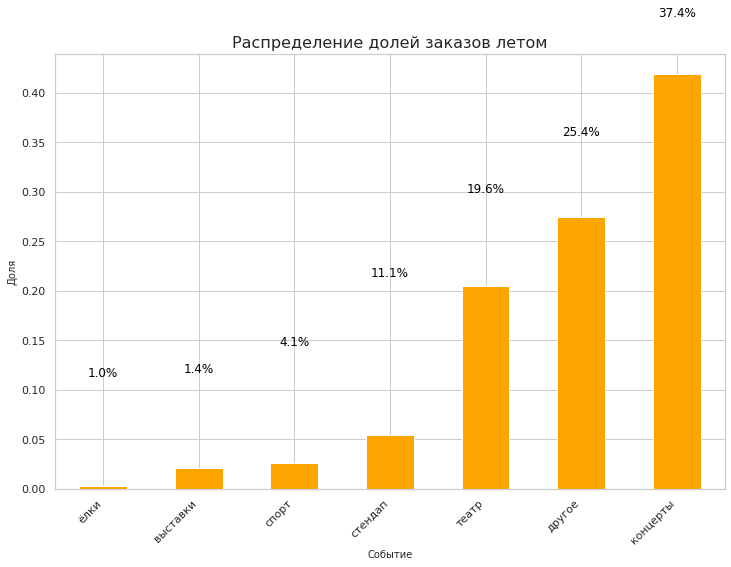

In [54]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
#График для лета
summer_events.plot(kind='bar', color='#FFA500' )
plt.title('Распределение долей заказов летом',fontsize=16)
plt.xlabel('Событие', fontsize=10)
plt.ylabel('Доля', fontsize=10)
plt.xticks(rotation=45, ha='right') # Поворачиваем метки оси X для лучшей читаемости
# Добавление чисел на столбцы
for i, v in enumerate(autumn_events):
    plt.text(i, v + 0.1, f"{v*100:.1f}%",color='black', ha='center', va='bottom',fontsize=12)
#ax = summer_events.plot()
#x_offset = 0.05
#y_offset = 0.05
#for p in ax.patches:
    #b = p.get_bbox()
    #val = "{:.2f}".format(b.y1 + b.y0)        
   # ax.annotate(val, (b.x1 + x_offset, b.y1 + y_offset))
plt.show()

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    Концерты, театры и категория "другое" самые популярные. Учитывая летний сезон, можно предположить, что значимую часть в категории "другое" занимают различные фестивали.
    Интересен момент, что елки имеют целый 1%. или это такие особенности графика, или кто-то празднует новый год летом. Может, это армяне празднуют Навасард 11 августа?

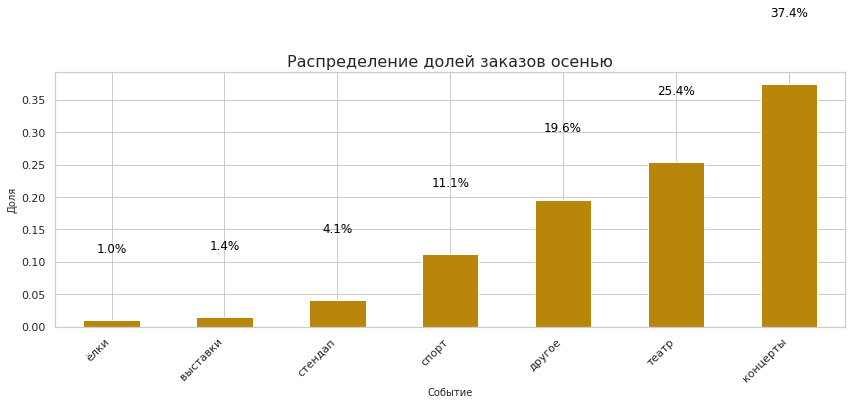

In [55]:
# Осень
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
#График для лета
autumn_events.plot(kind='bar', color='#B8860B' )
plt.title('Распределение долей заказов осенью',fontsize=16)
plt.xlabel('Событие', fontsize=10)
plt.ylabel('Доля', fontsize=10)
plt.xticks(rotation=45, ha='right') # Поворачиваем метки оси X для лучшей читаемости
# Добавление чисел на столбцы
#ax = autumn_events.plot()
#x_offset = 0.05
#y_offset = 0.05
#for p in ax.patches:
    #b = p.get_bbox()
    #val = "{:.2%}".format(b.y1 + b.y0)     
    #ax.annotate(val, (b.x1 + x_offset, b.y1 + y_offset))
for i, v in enumerate(autumn_events):
    plt.text(i, v + 0.1, f"{v*100:.1f}%",color='black', ha='center', va='bottom',fontsize=12)
plt.tight_layout() # Автоматически корректирует параметры подграфика, чтобы он помещался в область фигуры.
plt.show()


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    Популярность категории другое уже ниже, но еще входит в топ-3. Так же популярны тетры и беспорное 1-е место за концертами
    

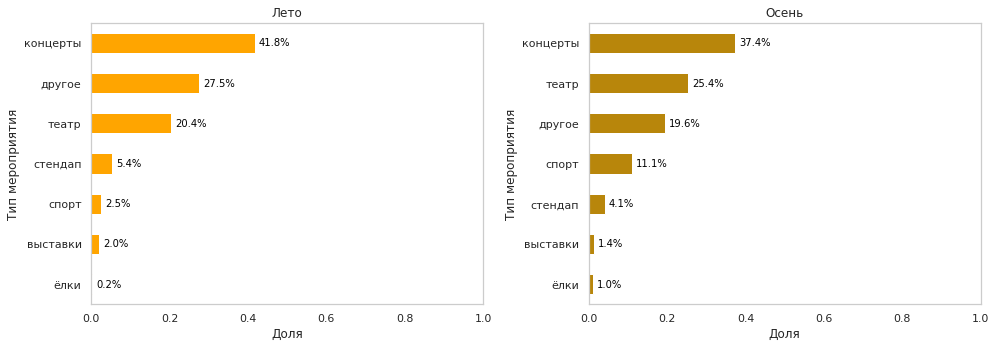

In [56]:
# Распределение заказов по event_type_main летом и осенью
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Лето
summer_bars = summer_events.plot(kind='barh', ax=axes[0], title='Лето', color='#FFA500')
axes[0].set_xlim(0, 1)
axes[0].set_xlabel('Доля')  
axes[0].set_ylabel('Тип мероприятия')  
axes[0].grid(False)

for i, v in enumerate(summer_events):
    summer_bars.text(v + 0.01, i, f"{v*100:.1f}%", color='black', va='center', fontsize=10)

# Осень
autumn_bars = autumn_events.plot(kind='barh', ax=axes[1], title='Осень', color='#B8860B')
axes[1].set_xlim(0, 1)
axes[1].set_xlabel('Доля')  
axes[1].set_ylabel('Тип мероприятия')  
axes[1].grid(False)
for i, v in enumerate(autumn_events):
    autumn_bars.text(v + 0.01, i, f"{v*100:.1f}%", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [57]:
# Распределение долей заказов (летом и осенью) по типам устройства device_type_canonical;
summer_type =summer['device_type_canonical'].value_counts(normalize=True).sort_values(ascending=True)
autumn_type =autumn['device_type_canonical'].value_counts(normalize=True).sort_values(ascending=True)

In [58]:
print(summer_type.head())
print(autumn_type.head())

desktop    0.19137
mobile     0.80863
Name: device_type_canonical, dtype: float64
desktop    0.203578
mobile     0.796422
Name: device_type_canonical, dtype: float64


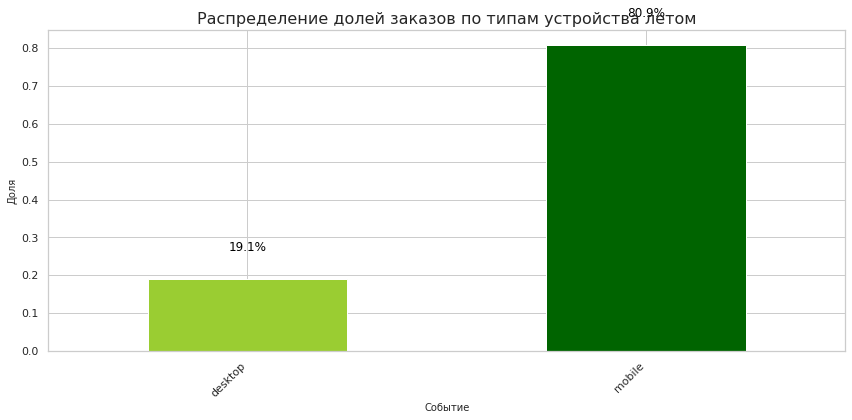

In [59]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
#График для лета
summer_type.plot(kind='bar', color=['#9ACD32','#006400'] )
plt.title('Распределение долей заказов по типам устройства летом',fontsize=16)
plt.xlabel('Событие', fontsize=10)
plt.ylabel('Доля', fontsize=10)
plt.xticks(rotation=45, ha='right') # Поворачиваем метки оси X для лучшей читаемости
# Добавление чисел на столбцы
for i, v in enumerate(summer_type):
    plt.text(i, v + 0.1, f"{v*100:.1f}%",color='black', ha='center', va='top',fontsize=12)
plt.tight_layout() # Автоматически корректирует параметры подграфика, чтобы он помещался в область фигуры.
plt.show()


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    Кто б сомневался, телефоны неша все 80.5% всех пользователей заказывают билеты через мобильные устройства.

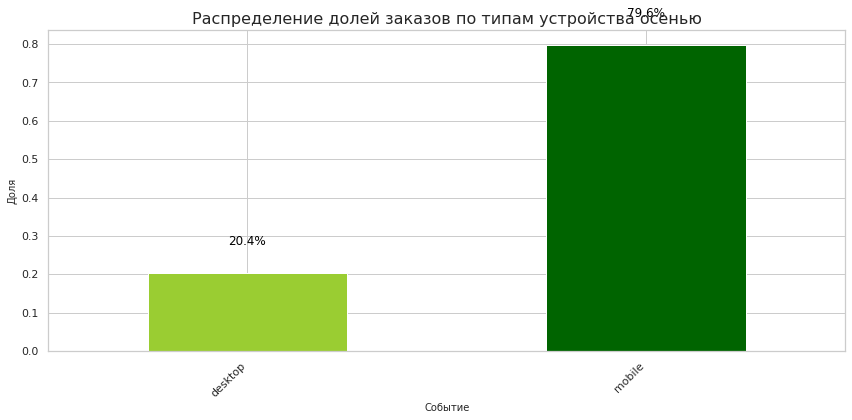

In [60]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
#График для лета
autumn_type.plot(kind='bar', color=['#9ACD32','#006400'] )
plt.title('Распределение долей заказов по типам устройства осенью',fontsize=16)
plt.xlabel('Событие', fontsize=10)
plt.ylabel('Доля', fontsize=10)
plt.xticks(rotation=45, ha='right') # Поворачиваем метки оси X для лучшей читаемости
# Добавление чисел на столбцы
for i, v in enumerate(autumn_type):
    plt.text(i, v + 0.1, f"{v*100:.1f}%",color='black', ha='center', va='top',fontsize=12)
plt.tight_layout() # Автоматически корректирует параметры подграфика, чтобы он помещался в область фигуры.
plt.show()

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    Раз большинство заказывает через мобильные устройства летом, то неудивительно, что все так же и осенью.

In [61]:
df['age_limit'].unique()

array([16,  0, 18, 12,  6])

In [62]:
# Подсчёт количества заказов по возрастным ограничениям 
orders_per_age_limit = df.groupby('age_limit')['order_id'].count().sort_values(ascending=True)
# Определяем палитру цветов для групп

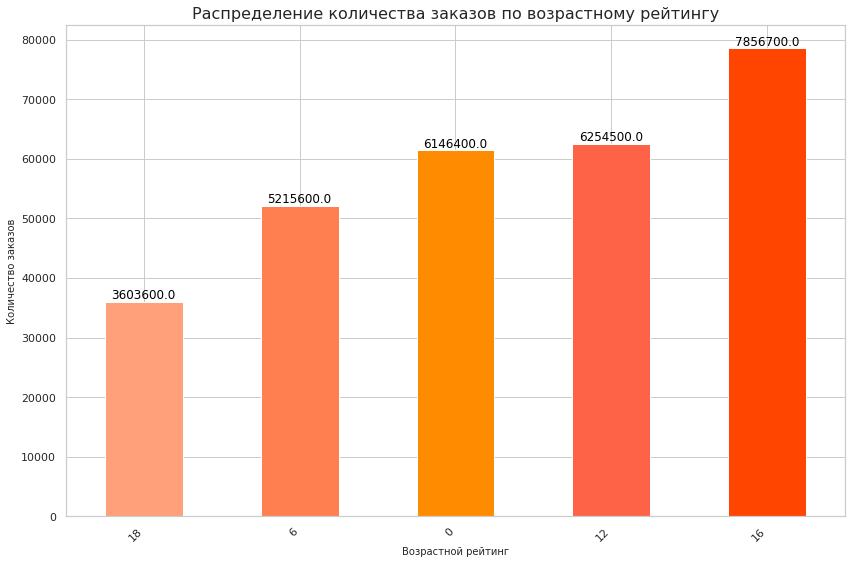

In [63]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
# Построение распределения по группам 
orders_per_age_limit.plot(kind='bar', color=['#FFA07A','#FF7F50','#FF8C00','#FF6347','#FF4500'])
plt.title('Распределение количества заказов по возрастному рейтингу',fontsize=16)
plt.xlabel('Возрастной рейтинг', fontsize=10)
plt.ylabel('Количество заказов', fontsize=10)
plt.xticks(rotation=45, ha='right') # Поворачиваем метки оси X для лучшей читаемости
# Добавление чисел на столбцы
for i, v in enumerate(orders_per_age_limit):
    plt.text(i, v + 0.1, f"{v*100:.1f}",color='black', ha='center', va='bottom',fontsize=12)
plt.tight_layout()
plt.show()

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    Большая часть мероприятий для лиц от 16 лет, на 2-м месте от 12, 3-м от 0.... Все для детей и семей !

In [64]:
# Изменение средней стоимости билета по типам мероприятий
summer_revenue = summer.groupby('event_type_main')['one_ticket_revenue_rub'].mean().sort_values(ascending=False)
autumn_revenue = autumn.groupby('event_type_main')['one_ticket_revenue_rub'].mean().sort_values(ascending=False)

In [65]:
# Создаем df из summer_revenue + autumn_revenue, и удаляем строки с пропусками.
comparison = pd.DataFrame({
    'summer': summer_revenue,
    'autumn': autumn_revenue
}).dropna()
# Разница в среднем чеке летом и осенью 
comparison['difference'] = (comparison['autumn'] - comparison['summer']) / comparison['summer'] * 100
print("Разница в средней стоимости билета")
display(comparison.sort_values(by='difference', ascending=False)) 

Разница в средней стоимости билета


,summer,autumn,difference
event_type_main,,,
выставки,86.443811,91.066619,5.347760
стендап,221.284353,232.626359,5.125535
другое,81.161303,78.503606,-3.274587
спорт,51.621066,49.772992,-3.580077
концерты,295.860789,273.613408,-7.519544
ёлки,274.749549,234.200450,-14.758568
театр,218.791836,179.703461,-17.865555


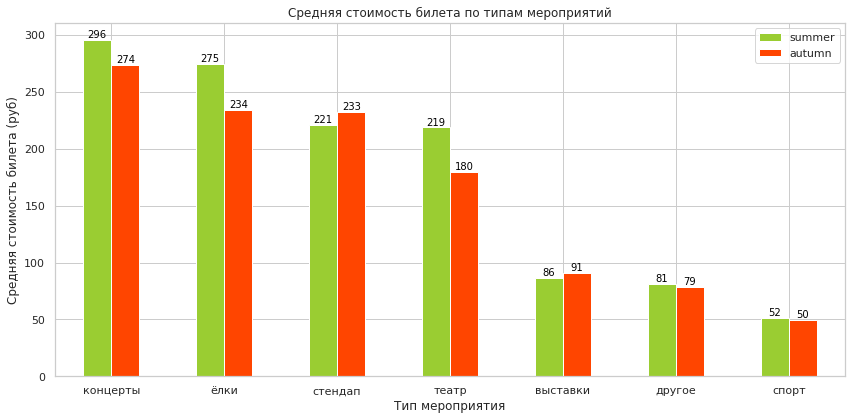

In [66]:
# Визуализация с измененными названиями только в легенде
ax = comparison[['summer', 'autumn']].plot(
    kind='bar', 
    figsize=(12, 6), 
    color=['#9ACD32', '#FF4500']
)
plt.title('Средняя стоимость билета по типам мероприятий')
plt.ylabel('Средняя стоимость билета (руб)')
plt.xlabel('Тип мероприятия')
plt.xticks(rotation=0)
plt.tight_layout()

# Добавляем подписи значений
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                fontsize=10, color='black', rotation=0)
plt.grid(True)
plt.show()

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    Есть небольшое снижение средней стоимости билета по большинству категорий к осени, а стендап и выставки показали рост цены.

In [72]:
# Найдем относительное изменение осенних значений по сравнению с летними. 
# Группируем данные по сезону и типу мероприятия
season_event = df_filter.groupby(['season', 'event_type_main']).size().reset_index(name='order_count')

In [73]:
# Расспределение количества заказов по сезонам
total_orders_by_season = season_event.groupby('season')['order_count'].sum()

In [74]:
# Рассчет для каждого типа мероприятия в каждом сезоне
season_event['part'] = season_event.apply(
    lambda row: row['order_count'] / total_orders_by_season[row['season']], axis=1)

display(season_event)

,season,event_type_main,order_count,part
0,лето,выставки,2415,0.020466
1,лето,другое,32439,0.274907
2,лето,концерты,49373,0.418415
3,лето,спорт,3008,0.025492
4,лето,стендап,6381,0.054076
5,лето,театр,24109,0.204314
6,лето,ёлки,275,0.002331
7,осень,выставки,2437,0.014383
8,осень,другое,33205,0.195974
9,осень,концерты,63309,0.373646


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
     осенью количество заказов растет, что указывает на сезонную зависимость спроса.
Сезонные предпочтения:
    летом преобладают концерты и театральные постановки и, вероятно, фестивали.
    осенью наблюдается ростет интерес к спорту, а театр и концерты так же популярны.
Происходит снижение средней стоимости билетов осенью, особенно заметна для концертов и театральных постановок.
Для стендапа и выставок цена немного выросла. Есть тенденция к уменьшению доли мероприятий 18+

## 3.2. Осенняя активность пользователей

- Динамика заказов по дням
- DAU и среднее число заказов на пользователя
- Средняя стоимость билета
- Недельная цикличность (будни vs. выходные)
- Вывод


In [75]:
# Фильтруем данные только за осень
autumn_season = df_filter[df_filter['season'].isin(['осень'])]

In [76]:
autumn_season.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169458 entries, 2 to 290767
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                169458 non-null  int64         
 1   user_id                 169458 non-null  object        
 2   created_dt_msk          169458 non-null  datetime64[ns]
 3   created_ts_msk          169458 non-null  datetime64[ns]
 4   event_id                169458 non-null  int64         
 5   cinema_circuit          169458 non-null  object        
 6   age_limit               169458 non-null  int64         
 7   currency_code           169458 non-null  object        
 8   device_type_canonical   169458 non-null  object        
 9   revenue                 169458 non-null  float64       
 10  service_name            169458 non-null  object        
 11  tickets_count           169458 non-null  int64         
 12  total                   169458

In [ ]:
# autumn_season['created_dt_msk'] = pd.to_datetime(autumn_season['created_dt_msk'])
# autumn_season['created_ts_msk'] = pd.to_datetime(autumn_season['created_ts_msk'])
autumn_season = autumn_season.copy()
    autumn_season['created_dt_msk'] = pd.to_datetime(autumn_season['created_dt_msk'])
    autumn_season['created_ts_msk'] = pd.to_datetime(autumn_season['created_ts_msk'])

In [ ]:
# Добавляем день недели (1-пн,2-вт... 7 -вс)
autumn_season['day_of_week'] = autumn_season['created_dt_msk'].dt.dayofweek + 1


In [80]:
# Агрегируем данные по дням
day_stats = autumn_season.groupby('created_dt_msk').agg(
    order_count=('order_id', 'count'),
    users=('user_id', 'nunique'),
    avg_revenue_ticket=('one_ticket_revenue_rub', 'mean')
).reset_index()

In [81]:
# Рассчет среднего количества заказов на 1 пользователя
day_stats['orders_per_user'] = day_stats['order_count'] / day_stats['users']

In [82]:
# Функция для добавления пиковых значений
def add_peak_values(ax, data, x_col, y_col, color='black'):
    peaks = data.nlargest(3, y_col)
    for x, y in zip(peaks[x_col], peaks[y_col]):
        ax.text(x, y, f'{int(y) if y_col != "orders_per_user" else f"{y:.2f}"}', 
                ha='center', va='bottom', fontsize=9,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1),
                color=color)

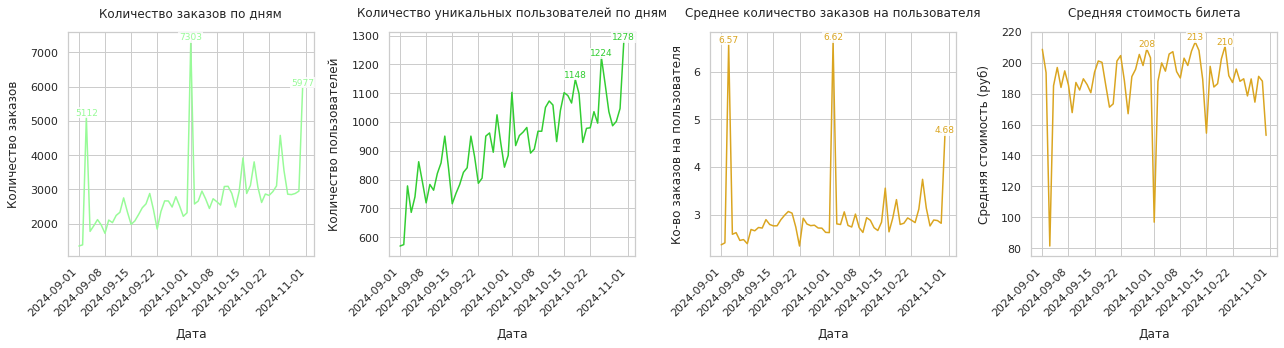

In [83]:
# Визуализация динамики заказов по дням
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Количество заказов в день
sns.lineplot(data=day_stats, x='created_dt_msk', y='order_count', ax=axes[0], color='#98FB98')
axes[0].set_xlabel('Дата', labelpad=10)
axes[0].set_ylabel('Количество заказов', labelpad=10)
axes[0].grid(True)
add_peak_values(axes[0], day_stats, 'created_dt_msk', 'order_count', '#98FB98')
axes[0].set_title('Количество заказов по дням', pad=15)

# DAU
sns.lineplot(data=day_stats, x='created_dt_msk', y='users', ax=axes[1], color='#32CD32')
axes[1].set_xlabel('Дата', labelpad=10)
axes[1].set_ylabel('Количество пользователей', labelpad=10)
axes[1].grid(True)
add_peak_values(axes[1], day_stats, 'created_dt_msk', 'users', '#32CD32')
axes[1].set_title('Количество уникальных пользователей по дням', pad=15)

# Среднее количество заказов на пользователя
sns.lineplot(data=day_stats, x='created_dt_msk', y='orders_per_user', ax=axes[2], color='#DAA520')
axes[2].set_xlabel('Дата', labelpad=10)
axes[2].set_ylabel('Ко-во заказов на пользователя', labelpad=10)
axes[2].grid(True)
add_peak_values(axes[2], day_stats, 'created_dt_msk', 'orders_per_user', '#DAA520')
axes[2].set_title('Среднее количество заказов на пользователя', pad=15)

# Средняя стоимость билета
ax4 = sns.lineplot(data=day_stats, x='created_dt_msk', y='avg_revenue_ticket', ax=axes[3], color='goldenrod')
axes[3].set_title('Средняя стоимость билета', pad=15)
axes[3].set_xlabel('Дата', labelpad=10)
axes[3].set_ylabel('Средняя стоимость (руб)', labelpad=10)
axes[3].grid(True)
add_peak_values(axes[3], day_stats, 'created_dt_msk', 'avg_revenue_ticket', 'goldenrod')

# Ротация на 45 градусов подписей оси х (дата) для всех графиков
for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        tick.set_ha('right')

plt.tight_layout()
plt.show()

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
  
    Количество заказов имеет недельную цикличность, пик активности наблюдается в выходные дни. 
    Совпедение аномальных всплесков средней цены и количества заказов может говорить о проведении акций/распродаж в эти дни
    Так же видна тенденция к росту числа заказов с сентября и до октября.
    Среднее число заказов на пользователя остаётся стабильным и находится в диапазоне от 4 до 7.
    Средняя стоимость билета достаточно стабильна и иколеблется в диапазоне от 80 до 250 рублей.
    Есть рекомендация: провести компании на увеличение среднего чека (средней стоимости билета).

In [84]:
# Анализ недельной цикличности
# Группировка по дням недели
week_stats = autumn_season.groupby('day_of_week').agg(
    order_count=('order_id', 'count'),
    users=('user_id', 'nunique'),
    avg_revenue_ticket=('one_ticket_revenue_rub', 'mean')
).reset_index()

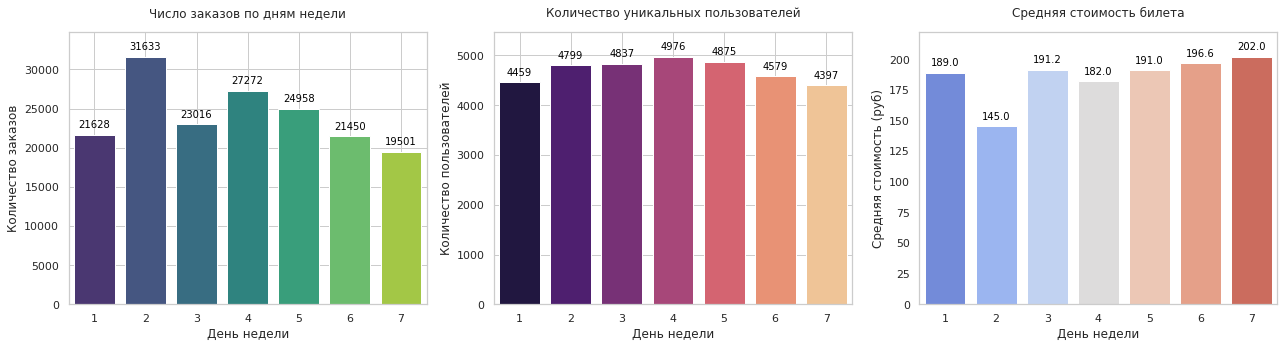

In [85]:
# Визуализация недельной цикличности
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Расределение числа заказов по дням
bar1 = sns.barplot(data=week_stats, x='day_of_week', y='order_count',
                  palette='viridis', ax=axes[0])
axes[0].set_title('Число заказов по дням недели', pad=15)
axes[0].set_xlabel('День недели')
axes[0].set_ylabel('Количество заказов')
axes[0].grid(True)

# Расределение числа уникальных пользователей по дням 
bar2 = sns.barplot(data=week_stats, x='day_of_week', y='users',
                  palette='magma', ax=axes[1])
axes[1].set_title('Количество уникальных пользователей', pad=15)
axes[1].set_xlabel('День недели')
axes[1].set_ylabel('Количество пользователей')
axes[1].grid(True)

# Расределение средней стоимости билета по дням
bar3 = sns.barplot(data=week_stats, x='day_of_week', y='avg_revenue_ticket',
                  palette='coolwarm', ax=axes[2])
axes[2].set_title('Средняя стоимость билета', pad=15)
axes[2].set_xlabel('День недели')
axes[2].set_ylabel('Средняя стоимость (руб)')
axes[2].grid(False)

# Общие настройки для всех графиков
for ax, bar in zip(axes, [bar1, bar2, bar3]):
    # Добавляем значения на столбцы
    for p in bar.patches:
        ax.annotate(f'{p.get_height():.0f}' if ax != axes[2] else f'{p.get_height():.1f}', 
                   (p.get_x() + p.get_width()/2., p.get_height()), 
                   ha='center', va='bottom', 
                   fontsize=10, color='black', xytext=(0, 5),
                   textcoords='offset points')
    
    # Увеличиваем пределы оси Y на 10%
    y_max = max([p.get_height() for p in bar.patches])
    ax.set_ylim(0, y_max * 1.1)

plt.tight_layout()
plt.show()

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    Высокая активность в середине недели, выделяется во вторник (31 633 заказов) и четверг (27 272 заказов). 
    Пятница и суббота имеют меньшее количество заказов (21 450 и 19 501 заказов). 

    Самое большое количество уникальных пользователей наблюдается в четверг (4 976 пользователей), а минимальное приходится на воскресенье (4 397 пользователей). 
    Средняя стоимость билета выше в выходные дни (196–202 рублей).
    Минимальная стоимость билета наблюдается в вторник (145 рублей)
    Высокая активность в середине недели подтверждает, что пользователи активно ищут и бронируют билеты заранее.
    
    Учитывая высокую активность во вторник и низкую стоимость билета относительно других дней, можно предположить, что большая часть ользователей заранее планируют поход на мероприятие, и возможно, сильно заранее берут билеты. 
    Часто, чем раньше куплен билет, тем он дешевле, отсюда и может быть такой минимум стоимости в середине недели (это не подтвержденная информация, а рассуждение)

## 3.3. Популярные события и партнёры

- Регионы с наибольшим количеством заказов и уникальных мероприятий
- Лидеры среди билетных партнёров по выручке и количеству заказов
- Вывод

In [86]:
# Группируем данные по регионам
region_stats = df.groupby('region_name').agg(
    unique_events=('event_id', 'nunique'),
    total_orders=('order_id', 'count'),
    total_revenue_rub=('revenue_rub', 'sum')
).reset_index()
region_stats.head()

,region_name,unique_events,total_orders,total_revenue_rub
0,Белоярская область,57,199,84536.87
1,Берестовский округ,39,395,289482.31
2,Берёзовская область,166,1282,204642.15
3,Боровлянский край,97,1721,1351022.05
4,Верховинская область,8,50,78525.11


In [87]:
# Сортировка 
    # по числу заказов
top_regions_by_orders = region_stats.sort_values(by='total_orders', ascending=False).head(10)

In [88]:
print("Топ-регионы по числу заказов:")
display(top_regions_by_orders.head())

Топ-регионы по числу заказов:


,region_name,unique_events,total_orders,total_revenue_rub
23,Каменевский регион,5983,91031,6.122349e+07
60,Североярская область,3814,44037,2.533599e+07
77,Широковская область,1233,16457,9.509246e+06
42,Медовская область,504,13895,2.943074e+06
45,Озернинский край,349,10476,9.769409e+06


In [89]:
 # по числу уникальных мероприятий
top_regions_by_events = region_stats.sort_values(by='unique_events', ascending=False).head(10)
print("Топ-регионы по числу уникальных мероприятий:")
display(top_regions_by_events.head())

Топ-регионы по числу уникальных мероприятий:


,region_name,unique_events,total_orders,total_revenue_rub
23,Каменевский регион,5983,91031,6.122349e+07
60,Североярская область,3814,44037,2.533599e+07
77,Широковская область,1233,16457,9.509246e+06
57,Светополянский округ,1075,7603,3.411102e+06
52,Речиновская область,702,6291,2.706626e+06


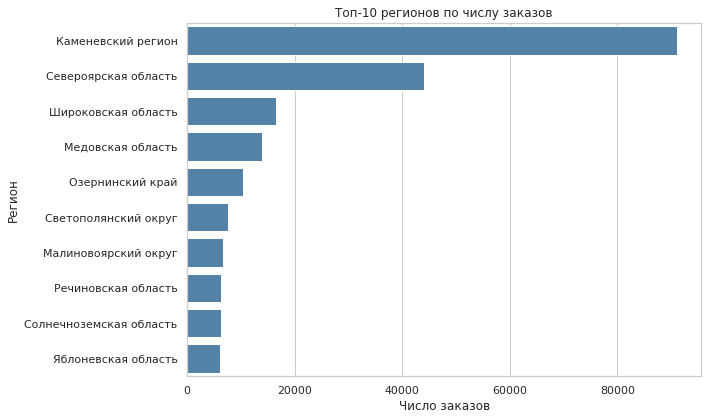

In [92]:
#Визуализация 

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_regions_by_orders,
    y='region_name',
    x='total_orders',
    color='steelblue'  
)
plt.title('Топ-10 регионов по числу заказов')
plt.xlabel('Число заказов')
plt.ylabel('Регион')
plt.tight_layout()
plt.show()


In [93]:
# Лидеры среди билетных партнёров по выручке и количеству заказов
# Группируем данные по партнёрам
partner_stats = df.groupby('service_name').agg(
    unique_events=('event_id', 'nunique'),
    total_orders=('order_id', 'count'),
    total_revenue_rub=('revenue_rub', 'sum')
).reset_index()

In [94]:
# Сортировка
    # по числу заказов
top_partners_by_orders = partner_stats.sort_values(by='total_orders', ascending=False).head(10)
print("Топ-партнёры по числу заказов:")
display(top_partners_by_orders.head())

Топ-партнёры по числу заказов:


,service_name,unique_events,total_orders,total_revenue_rub
3,Билеты без проблем,4263,63676,2.617306e+07
21,Лови билет!,4884,41114,1.766168e+07
5,Билеты в руки,3544,40350,1.338557e+07
24,Мой билет,1310,34835,1.909266e+07
25,Облачко,2348,26642,2.164407e+07


In [95]:
    # по выручке
top_partners_by_revenue = partner_stats.sort_values(by='total_revenue_rub', ascending=False).head(10)
print("Топ-партнёры по выручке:")
display(top_partners_by_revenue.head())

Топ-партнёры по выручке:


,service_name,unique_events,total_orders,total_revenue_rub
3,Билеты без проблем,4263,63676,26173056.96
25,Облачко,2348,26642,21644068.03
24,Мой билет,1310,34835,19092659.13
8,Весь в билетах,867,16847,18047533.97
21,Лови билет!,4884,41114,17661682.94


In [96]:
    # по числу уникальных мероприятий
top_partners_by_events = partner_stats.sort_values(by='unique_events', ascending=False).head(10)
print("Топ-партнёры по числу уникальных мероприятий:")
display(top_partners_by_events.head())

Топ-партнёры по числу уникальных мероприятий:


,service_name,unique_events,total_orders,total_revenue_rub
21,Лови билет!,4884,41114,1.766168e+07
3,Билеты без проблем,4263,63676,2.617306e+07
5,Билеты в руки,3544,40350,1.338557e+07
25,Облачко,2348,26642,2.164407e+07
22,Лучшие билеты,1763,17791,2.823151e+06


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    Топ-регионы:
    
 - Каменевский регион	
 - Североярская область	
 - Широковская область	

   Топ- партнёры:
    
 - Билеты без проблем	
 - Мой билет	
 - Облачко	


##  4. Статистический анализ данных

    Коллеги из продуктового отдела хотят отдельно проверить несколько гипотез относительно активности пользователей мобильных и стационарных устройств. 
        1.Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
        2.Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.
        Данные только за осенний период!

    Гипотеза 1.Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
H0 среднее количество заказов на 1 пользователя в мобильном приложении и ПК одинакова 

H1 среднее количество заказов на 1 пользователя в мобильном приложении выше

In [97]:
# Подготовка данных
# Оставляем только осенние данные 
autumn_season = df_filter[df_filter['season'].isin(['осень'])]
autumn_season.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,month_name
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",Октябрь
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",Октябрь
5,2613713,000898990054619,2024-10-23,2024-10-23 15:12:00,500862,нет,12,rub,mobile,902.74,...,концерт,концерты,№1020,Лугоградская область,Кристалевск,193.0,930.0,"Школа живописи ""Солнце"" Групп","бул. Отрадный, д. 4 стр. 1",Октябрь
7,4657981,000a55a418c128c,2024-09-29,2024-09-29 19:39:12,265857,нет,12,rub,mobile,47.78,...,спектакль,театр,№1637,Поленовский край,Дальнозолотск,18.0,3159.0,"Клуб начинающих писателей ""Таблицы"" Групп","ул. О.Кошевого, д. 7",Сентябрь
8,4657952,000a55a418c128c,2024-10-15,2024-10-15 10:29:04,271579,нет,12,rub,mobile,74.84,...,спектакль,театр,№1637,Поленовский край,Дальнозолотск,18.0,3159.0,"Клуб начинающих писателей ""Таблицы"" Групп","ул. О.Кошевого, д. 7",Октябрь


In [98]:
# Среднее число заказов на 1 пользователя по типу устройства
avg_orders_device_type = autumn_season.groupby(['user_id', 'device_type_canonical']).size().reset_index(name='order_count')

In [99]:
avg_orders_device_type.describe()

,order_count
count,19074.000000
mean,8.884240
std,61.805577
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,4364.000000


In [100]:
ninety_ninth_percentile = np.percentile(avg_orders_device_type['order_count'], 99)
print("99-й перцентиль:", ninety_ninth_percentile)

99-й перцентиль: 112.0


In [101]:
# Разделяем на 2 группы по типу устройства
mobile_orders = avg_orders_device_type[avg_orders_device_type['device_type_canonical'] == 'mobile']['order_count']
desktop_orders = avg_orders_device_type[avg_orders_device_type['device_type_canonical'] == 'desktop']['order_count']

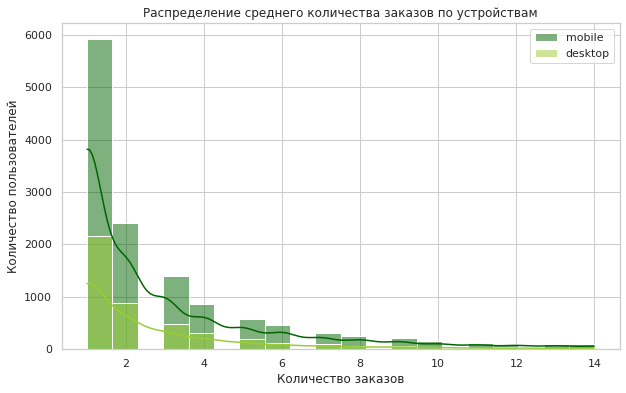

In [102]:
# Визуализация распределения среднего количества заказов
# Настройка стиля графика

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
# Построение распределения по группам
sns.histplot(data=mobile_orders[mobile_orders < 15], color='#006400', label='mobile', bins=20, kde=True)
sns.histplot(data=desktop_orders[desktop_orders <15], color='#9ACD32', label='desktop', bins=20, kde=True)
#Вывод
plt.title('Распределение среднего количества заказов по устройствам')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.legend()
plt.show()

In [103]:
# Проверяем пересечения пользователей между группами с помощью группировки
intersection_count = df_filter.groupby('user_id').agg({'device_type_canonical': 'nunique'}).query('device_type_canonical > 1')
# Выводим результат
if not intersection_count.empty:
    print(f"Количество пользователей, попавших в обе группы: {intersection_count}")
    print("Пользователи в пересечении:")
    print(intersection_count)
else:
    print("Пересечений между группами нет.")

Количество пользователей, попавших в обе группы:                  device_type_canonical
user_id                               
00245c702bc343e                      2
0028d17a676f8c8                      2
002b75ca606ba46                      2
002ec276eee9b0b                      2
0040e12d70fae81                      2
...                                ...
ffb556471d3ea4d                      2
ffc0234bdbb10b1                      2
ffd530dc2b699b0                      2
ffdadadd5de9c4b                      2
fffcd3dde79eb2c                      2

[4922 rows x 1 columns]
Пользователи в пересечении:
                 device_type_canonical
user_id                               
00245c702bc343e                      2
0028d17a676f8c8                      2
002b75ca606ba46                      2
002ec276eee9b0b                      2
0040e12d70fae81                      2
...                                ...
ffb556471d3ea4d                      2
ffc0234bdbb10b1                      2
f

In [ ]:
intersection_users = intersection_count.index
df_filtered_no_intersection = df_filter[~df_filter['user_id'].isin(intersection_users)]

# контрль удаления
total_users = df_filter['user_id'].nunique()
removed_users = len(intersection_users)
removed_ratio = removed_users / total_users
print(f"Доля удалённых пользователей: {removed_ratio:.2%}")

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    Большинство пользователей оформляют один заказ, меньше 1000 пользователей оформили 4 и более.

In [105]:
#Количество пользователей в группах
print(f"Количество пользователей в группе мобильных устройств: {mobile_orders.nunique()}")
print(f"Количество пользователей в группе стационарных устройств:{desktop_orders.nunique()}")

Количество пользователей в группе мобильных устройств: 225
Количество пользователей в группе стационарных устройств:129


In [106]:
# Не указано MDE для тестов, методом подбора выяснено, что можно заметить при таком ко-е человек в группах MDE = 0.35
# Не уверена, что эта ячейка вообще тут нужна
from statsmodels.stats.power import NormalIndPower
# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 0.8  # Мощность теста
mde = 0.35  # Минимальный детектируемый эффект

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = mde,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 128


In [107]:
#Гипотеза 1.Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
    #H0 среднее количество заказов на 1 пользователя в мобильном приложении и ПК одинакова
    #H1 среднее количество заказов на 1 пользователя в мобильном приложении выше
#Группы неравномерны, поэтому подходит тест Манна-Уитни
# Проверка гипотезы
stat, p_value = mannwhitneyu(mobile_orders, desktop_orders, alternative='greater')

print(f"p-value = {p_value:.5f}")
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: среднее число заказов в группе мобильных устройств больше.")
else:
    print("Не отвергаем нулевую гипотезу: нет доказательства, что среднее число заказов на 1 пользователя в группе мобильных устройств больше.")

p-value = 0.00000
Отвергаем нулевую гипотезу: среднее число заказов в группе мобильных устройств больше.


    Гипотеза 2.Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.
        H0: Среднее время между заказами одинаково для мобильных и стационарных устройств
        H1: Среднее время между заказами больше у пользователей мобильных устройств

In [108]:
# Среднее время между заказами стб days_since_prev
time_between_orders = autumn_season.dropna(subset=['days_since_prev'])

In [109]:
time_between_orders.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,month_name
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",Октябрь
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",Октябрь
5,2613713,000898990054619,2024-10-23,2024-10-23 15:12:00,500862,нет,12,rub,mobile,902.74,...,концерт,концерты,№1020,Лугоградская область,Кристалевск,193.0,930.0,"Школа живописи ""Солнце"" Групп","бул. Отрадный, д. 4 стр. 1",Октябрь
8,4657952,000a55a418c128c,2024-10-15,2024-10-15 10:29:04,271579,нет,12,rub,mobile,74.84,...,спектакль,театр,№1637,Поленовский край,Дальнозолотск,18.0,3159.0,"Клуб начинающих писателей ""Таблицы"" Групп","ул. О.Кошевого, д. 7",Октябрь
27,2303442,001e7037d013f0f,2024-09-16,2024-09-16 21:13:17,494565,нет,16,rub,mobile,306.58,...,концерт,концерты,№881,Малиновоярский округ,Верховино,197.0,4113.0,"Мастерская живого действия ""Гардероб"" Лимитед","ш. 30 лет Победы, д. 38 стр. 664",Сентябрь


In [110]:
# Среднее время между заказами равно
time_between_orders['days_since_prev'].mean()

3.623093587252717

In [111]:
time_between_orders['days_since_prev'].max()

148.0

In [112]:
time_between_orders['days_since_prev'].min()

0.0

In [113]:
ninety_ninth_percentile = np.percentile(time_between_orders['days_since_prev'], 99)
print("99-й перцентиль:", ninety_ninth_percentile)

99-й перцентиль: 77.0


In [114]:
# Разделяем данные на группы по типу устройства
mobile_days = time_between_orders[time_between_orders['device_type_canonical'] == 'mobile']['days_since_prev']
desktop_days = time_between_orders[time_between_orders['device_type_canonical'] == 'desktop']['days_since_prev']

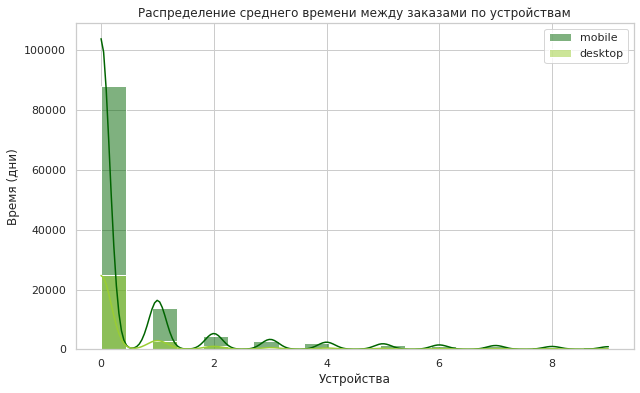

In [115]:
# Визуализация распределения среднего времени между заказами
# Настройка стиля графика
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
# Построение распределения по группам
sns.histplot(data=mobile_days[mobile_days < 10], color='#006400', label='mobile', bins=20, kde=True)
sns.histplot(data=desktop_days[desktop_days < 10], color='#9ACD32', label='desktop', bins=20, kde=True)
#Вывод
plt.title('Распределение среднего времени между заказами по устройствам')
plt.xlabel('Устройства')
plt.ylabel('Время (дни)')
plt.legend()
plt.show()

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    Большинство пользователей делают заказы сразу или через короткий промежуток времени.

In [116]:
#Гипотеза 2.Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.
    #H0: Среднее время между заказами одинаково для мобильных и стационарных устройств
    #H1: Среднее время между заказами больше у пользователей мобильных устройств
#Проверка 2 гипотезы
# Проверка гипотезы
stat, p_value = mannwhitneyu(mobile_days, desktop_days, alternative='greater')

print(f"p-value = {p_value:.5f}")
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: время между заказами больше в группе мобильных устройств больше.")
else:
    print("Не отвергаем нулевую гипотезу: нет доказательства, что время между заказами в группе мобильных устройств больше.")

p-value = 0.00000
Отвергаем нулевую гипотезу: время между заказами больше в группе мобильных устройств больше.


##  5. Общий вывод и рекомендации


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
  EDA
1. Подтверждена сезонность роста активности пользователей осенью.
    Рекомендация установить до какого месяца идет рост активности осенью, до ноября?
2. Замечено снижение средней стоимости билета осенью, особенно для концертов и театра.

3. Количество заказов и DAU растёт с августа, и с сентября по октябрь
4. Наибольшая активность в выходные дни и средняя стоимость билета выше в пятницу и субботу.
5. Много запланированных заранее заказов на мероприятия в середине недели

6. Каменевский регион - лидер по количеству заказов и разнообразию мероприятий.
7. "Билеты без проблем" - лидер по числу заказов, а "Мой билет" - по суммарной выручке.

    Проверены и подтверждены две гипотезы:

1. Пользователи мобильных устройств делают больше заказов.
2. Среднее время между заказами у пользователей мобильных устройств больше, чем у стационарных.

    Общие рекомендации:
Внимание на пользователей мобильными устройствами
    - улучшение интерфейса приложения
    - персональные предложения
    - программа лояльности?

Рекомендуется запуск компании для повышению среднего чека (колеблется в диапазоне от 80 до 250 рублей)

Каменевский регион - лидер по количеству заказов и разнообразию мероприятий
    Рекомендуется расширять и удрживать на высоком уровне сотрудничество с местными организаторами и площадками

Продолжать сотрудничество с компанией "Билеты без проблем" и "Мой билет".
Возможно рассмотреть программы лояльности и бонусов. Также программы лояльности для партнёров с высокой стоимостью билета, не вошедших в топ.
    Продолжить наблюдение за динамикой осенью - месяц ноябрь для полноты картины и отслеживания в метриках осенне-зимних тенденций